In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import os
root_path = '../'
data_path = os.path.join(root_path, 'data')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import sys
sys.path.append('../')

from src.utils.model_selection import cv_splits
from src.data.preproc import split_xy
from src.evaluate.evaluate import evaluate_normal

In [5]:
target_site = '11238600'

In [6]:
streamflow = pd.read_csv(
            os.path.join(
                data_path, 
                'raw', 
                'streamflow.csv'),
            parse_dates = ['DATE'],
            index_col='DATE'
           )

In [7]:
VAL_SIZE = .2

In [8]:
split_indices = cv_splits(streamflow, VAL_SIZE)

In [9]:
from sklearn.linear_model import LinearRegression

cv 0
validation root mean squared error: 291.36684674248835
validation r2 score 0.9822650470299081 

visualize the prediction for validation set: 


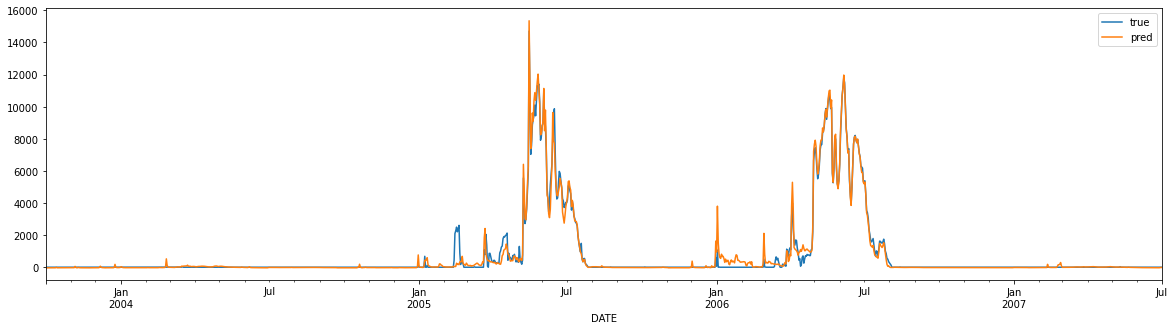

cv 1
validation root mean squared error: 363.5098224165484
validation r2 score 0.9040212845059448 

visualize the prediction for validation set: 


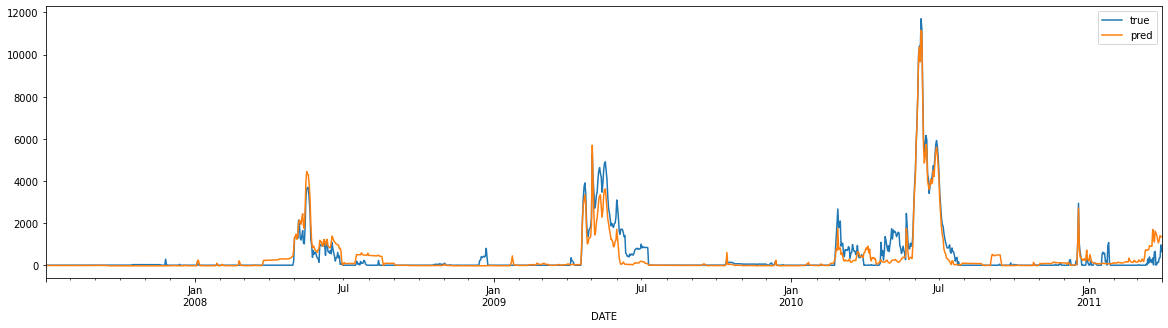

cv 2
validation root mean squared error: 219.2714219378335
validation r2 score 0.9800464164817277 

visualize the prediction for validation set: 


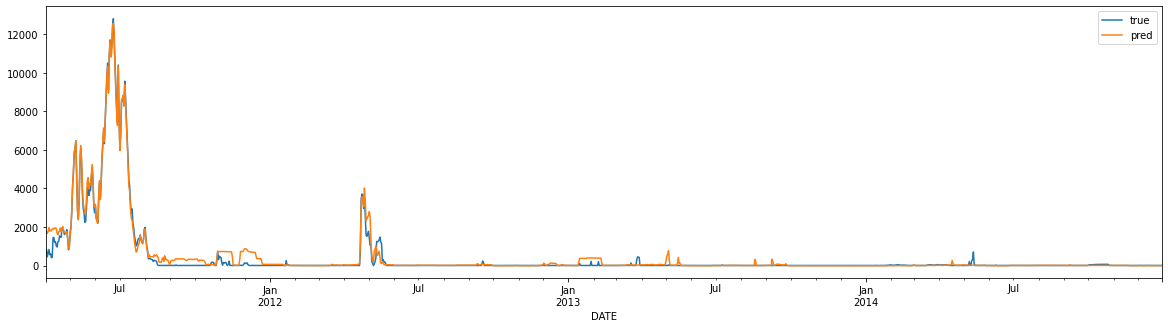

In [10]:
for idx, split in enumerate(split_indices):
    print(f'cv {idx}')
    train_idx, val_idx = split
    model = LinearRegression()
    evaluate_normal(streamflow, train_idx, val_idx, target_site, model)

In [11]:
from sklearn.ensemble import RandomForestRegressor

cv 0
validation root mean squared error: 267.5613204844214
validation r2 score 0.9850446550521212 

visualize the prediction for validation set: 


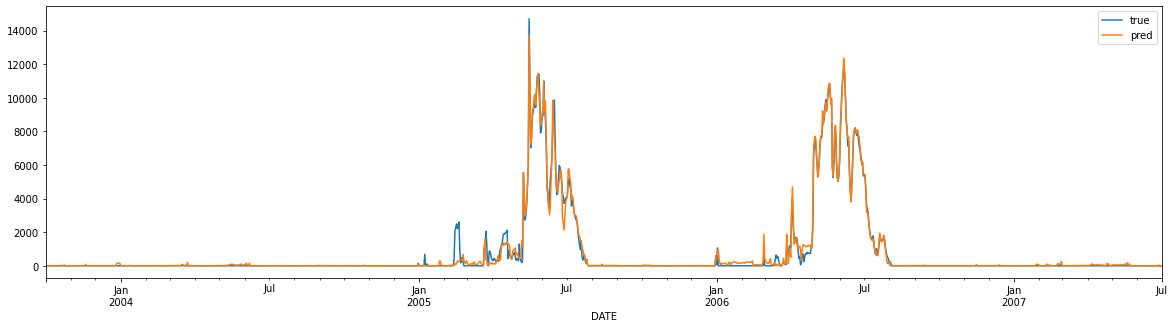

cv 1
validation root mean squared error: 357.2592613997856
validation r2 score 0.9072936196873451 

visualize the prediction for validation set: 


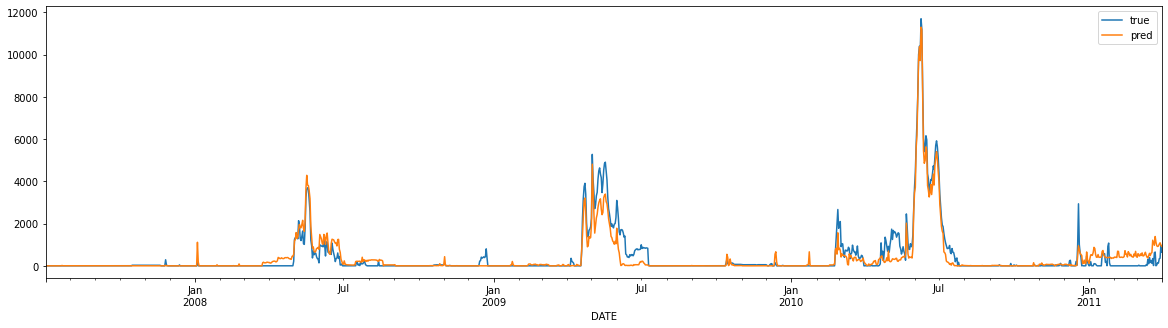

cv 2
validation root mean squared error: 219.21109463049268
validation r2 score 0.9800573944775268 

visualize the prediction for validation set: 


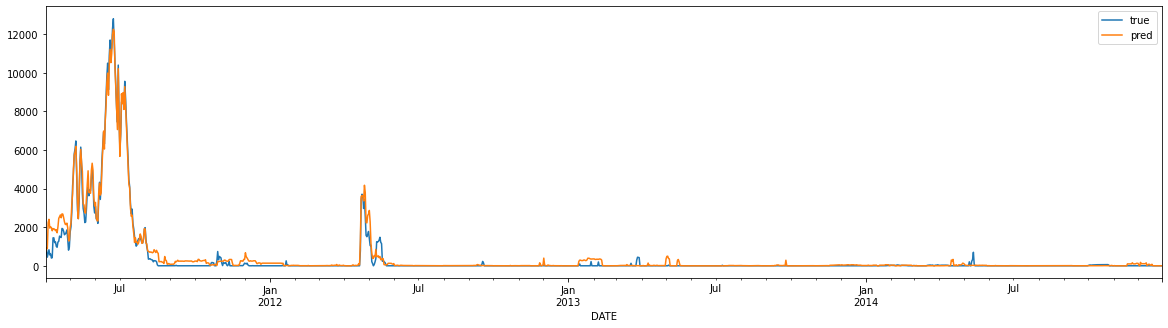

In [12]:
for idx, split in enumerate(split_indices):
    print(f'cv {idx}')
    train_idx, val_idx = split
    model = RandomForestRegressor()
    evaluate_normal(streamflow, train_idx, val_idx, target_site, model)